## 1- Setup

In [1]:
!pip install split-folders matplotlib opencv-python spicy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import random
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2- Keras data generator

In [3]:
class_names = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

In [4]:
datagen = ImageDataGenerator()

In [5]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 13173 images belonging to 6 classes.


In [6]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/validation", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 3010 images belonging to 6 classes.


In [7]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="/content/drive/MyDrive/Image classification/dataset/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 861 images belonging to 6 classes.


## 3- load the model

In [8]:
pre_trained_model = EfficientNetB0(input_shape = (224, 224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

In [9]:
x = pre_trained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

# 4- train the model

In [10]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model_history = model.fit(train_generator, validation_data=valid_generator, epochs=20, batch_size=32)

Epoch 1/20
412/412 [==============================] - 3224s 8s/step - loss: 0.3729 - accuracy: 0.8685 - val_loss: 0.2213 - val_accuracy: 0.9203
Epoch 2/20
412/412 [==============================] - 71s 171ms/step - loss: 0.2496 - accuracy: 0.9122 - val_loss: 0.2114 - val_accuracy: 0.9279
Epoch 3/20
412/412 [==============================] - 70s 170ms/step - loss: 0.2251 - accuracy: 0.9211 - val_loss: 0.2161 - val_accuracy: 0.9266
Epoch 4/20
412/412 [==============================] - 59s 143ms/step - loss: 0.2124 - accuracy: 0.9235 - val_loss: 0.2027 - val_accuracy: 0.9316
Epoch 5/20
412/412 [==============================] - 57s 139ms/step - loss: 0.2072 - accuracy: 0.9248 - val_loss: 0.2131 - val_accuracy: 0.9259
Epoch 6/20
412/412 [==============================] - 58s 140ms/step - loss: 0.1939 - accuracy: 0.9298 - val_loss: 0.2097 - val_accuracy: 0.9296
Epoch 7/20
412/412 [==============================] - 56s 136ms/step - loss: 0.1940 - accuracy: 0.9278 - val_loss: 0.2168 - val_acc

5- evaluate the model

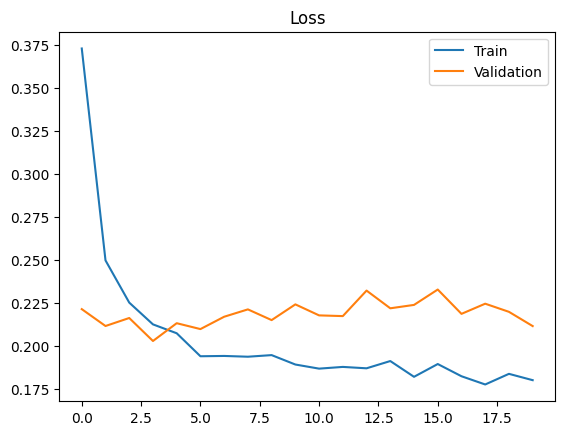

In [11]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

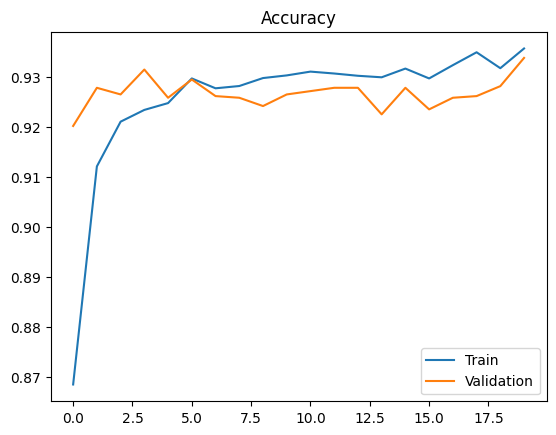

In [12]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

27/27 [==============================] - 197s 8s/step - loss: 0.2768 - accuracy: 0.9141
The test loss is:  0.27679020166397095
The best accuracy is:  91.40534400939941


6- save the model

In [ ]:
!pip install tensorflow==2.9.1

In [12]:
model.save("/content/drive/MyDrive/Image classification/EFFICIENTNET/EFFICIENTNET_Classifier.h5")
print("Saved model to disk")

model.save_weights("/content/drive/MyDrive/Image classification/models/EFFICIENTNET/EFFICIENTNET_weights.h5")

Saved model to disk


7- test data

In [13]:
test_dir = '/content/drive/MyDrive/Image classification/dataset/test'
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=32, directory=test_dir,
target_size=(224, 224), class_mode='categorical')

Found 861 images belonging to 6 classes.


1/1 [==============================] - 0s 51ms/step


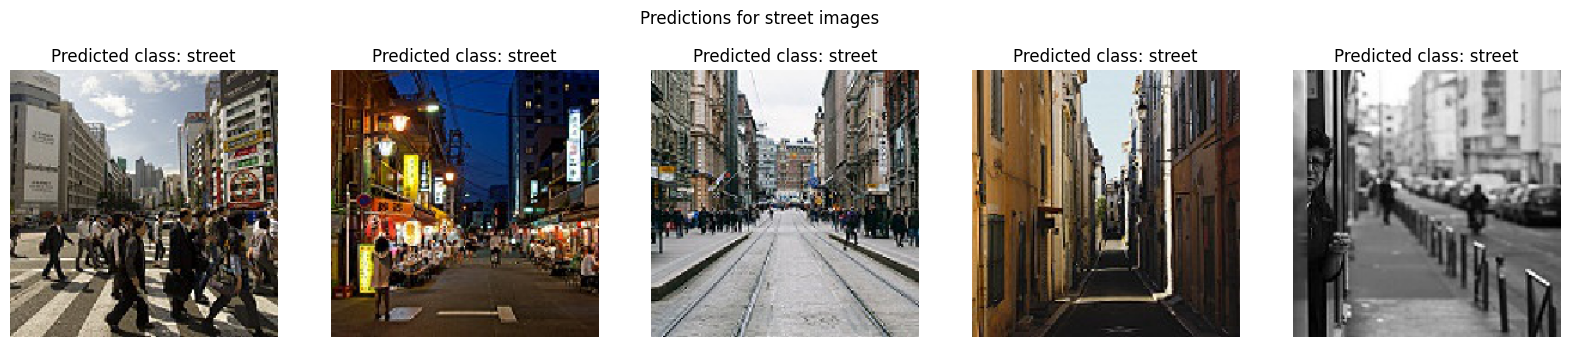

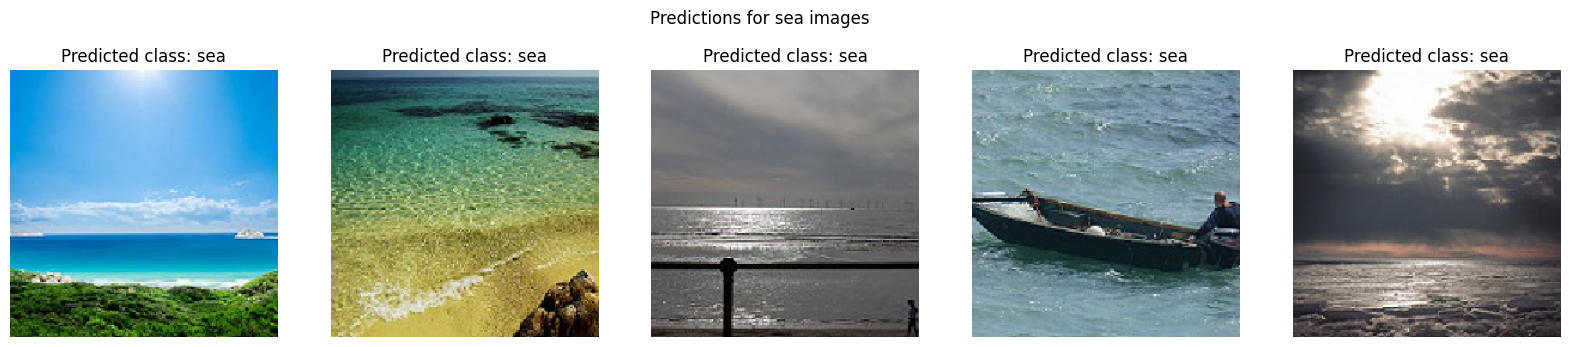

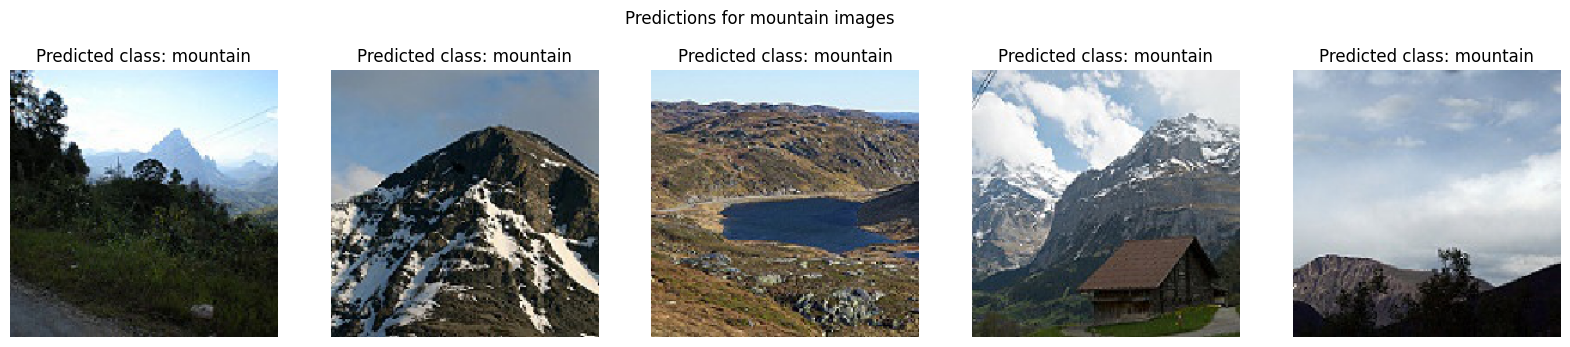

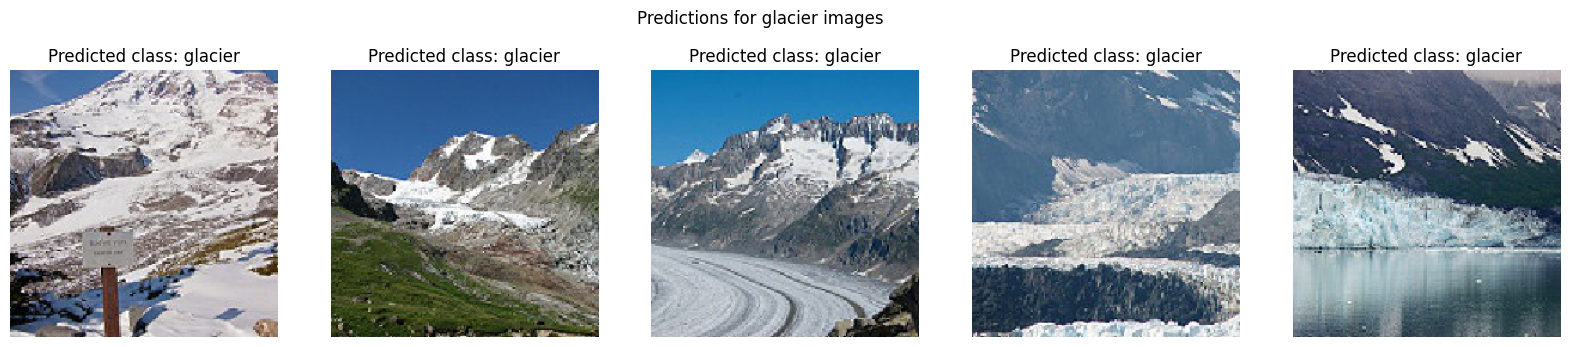

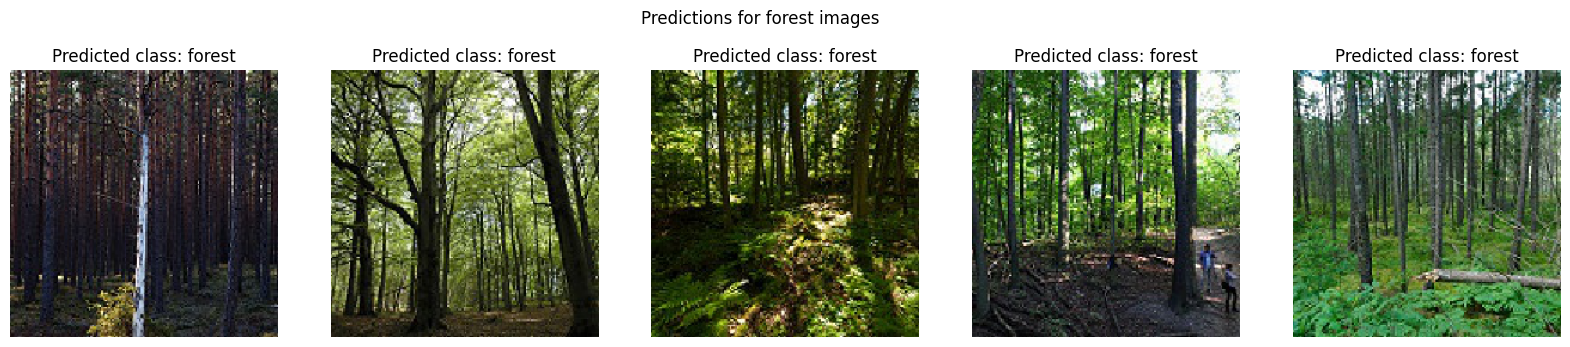

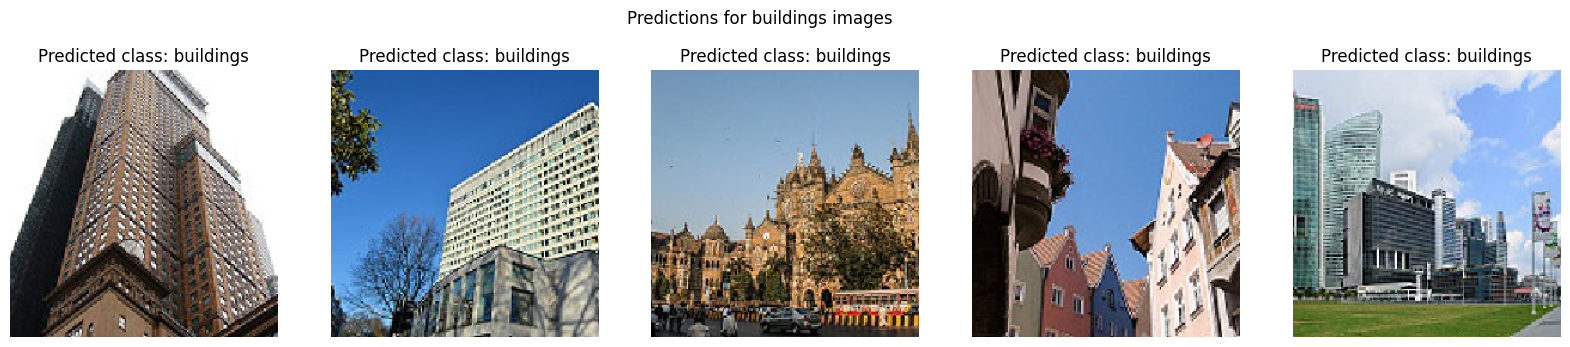

In [14]:
# define classes name
class_names = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

# initialize a list to store the predictions
predictions_list = []

# loop over each class folder
for class_name in class_names:

    # set the path to the current class folder
    class_dir = os.path.join(test_dir, class_name)

    # initialize a list to store the image paths
    image_paths = []

    # loop over the first 5 images in the current class folder
    image_names = random.sample(os.listdir(class_dir), k=5)
    image_paths = [os.path.join(class_dir, img) for img in image_names]

    # load the images and convert them to numpy arrays
    images = []
    for image_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    images = np.array(images)

    # generate predictions for the images
    predictions = model.predict(images)

    # generate argmax for predictions
    class_ids = np.argmax(predictions, axis=1)

    # transform classes number into classes name
    predicted_classes = [class_names[class_id] for class_id in class_ids]

    # store the predictions
    predictions_list.append((class_name, image_paths, predicted_classes))

# plot the predictions
for class_name, image_paths, predicted_classes in predictions_list:
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f'Predictions for {class_name} images')
    for i, image_path in enumerate(image_paths):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Predicted class: {predicted_classes[i]}')
    plt.show()